In [5]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = r"C:\Users\cuted\OneDrive\Desktop\Train\Train\Healthy"
train_files_powdery = r"C:\Users\cuted\OneDrive\Desktop\Train\Train\Powdery"
train_files_rust = r"C:\Users\cuted\OneDrive\Desktop\Train\Train\Rust"

test_files_healthy = r"C:\Users\cuted\OneDrive\Desktop\Test\Test\Healthy"
test_files_powdery = r"C:\Users\cuted\OneDrive\Desktop\Test\Test\Powdery"
test_files_rust = r"C:\Users\cuted\OneDrive\Desktop\Test\Test\Rust"

valid_files_healthy = r"C:\Users\cuted\OneDrive\Desktop\Validation\Validation\Healthy"
valid_files_powdery = r"C:\Users\cuted\OneDrive\Desktop\Validation\Validation\Powdery"
valid_files_rust = r"C:\Users\cuted\OneDrive\Desktop\Validation\Validation\Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


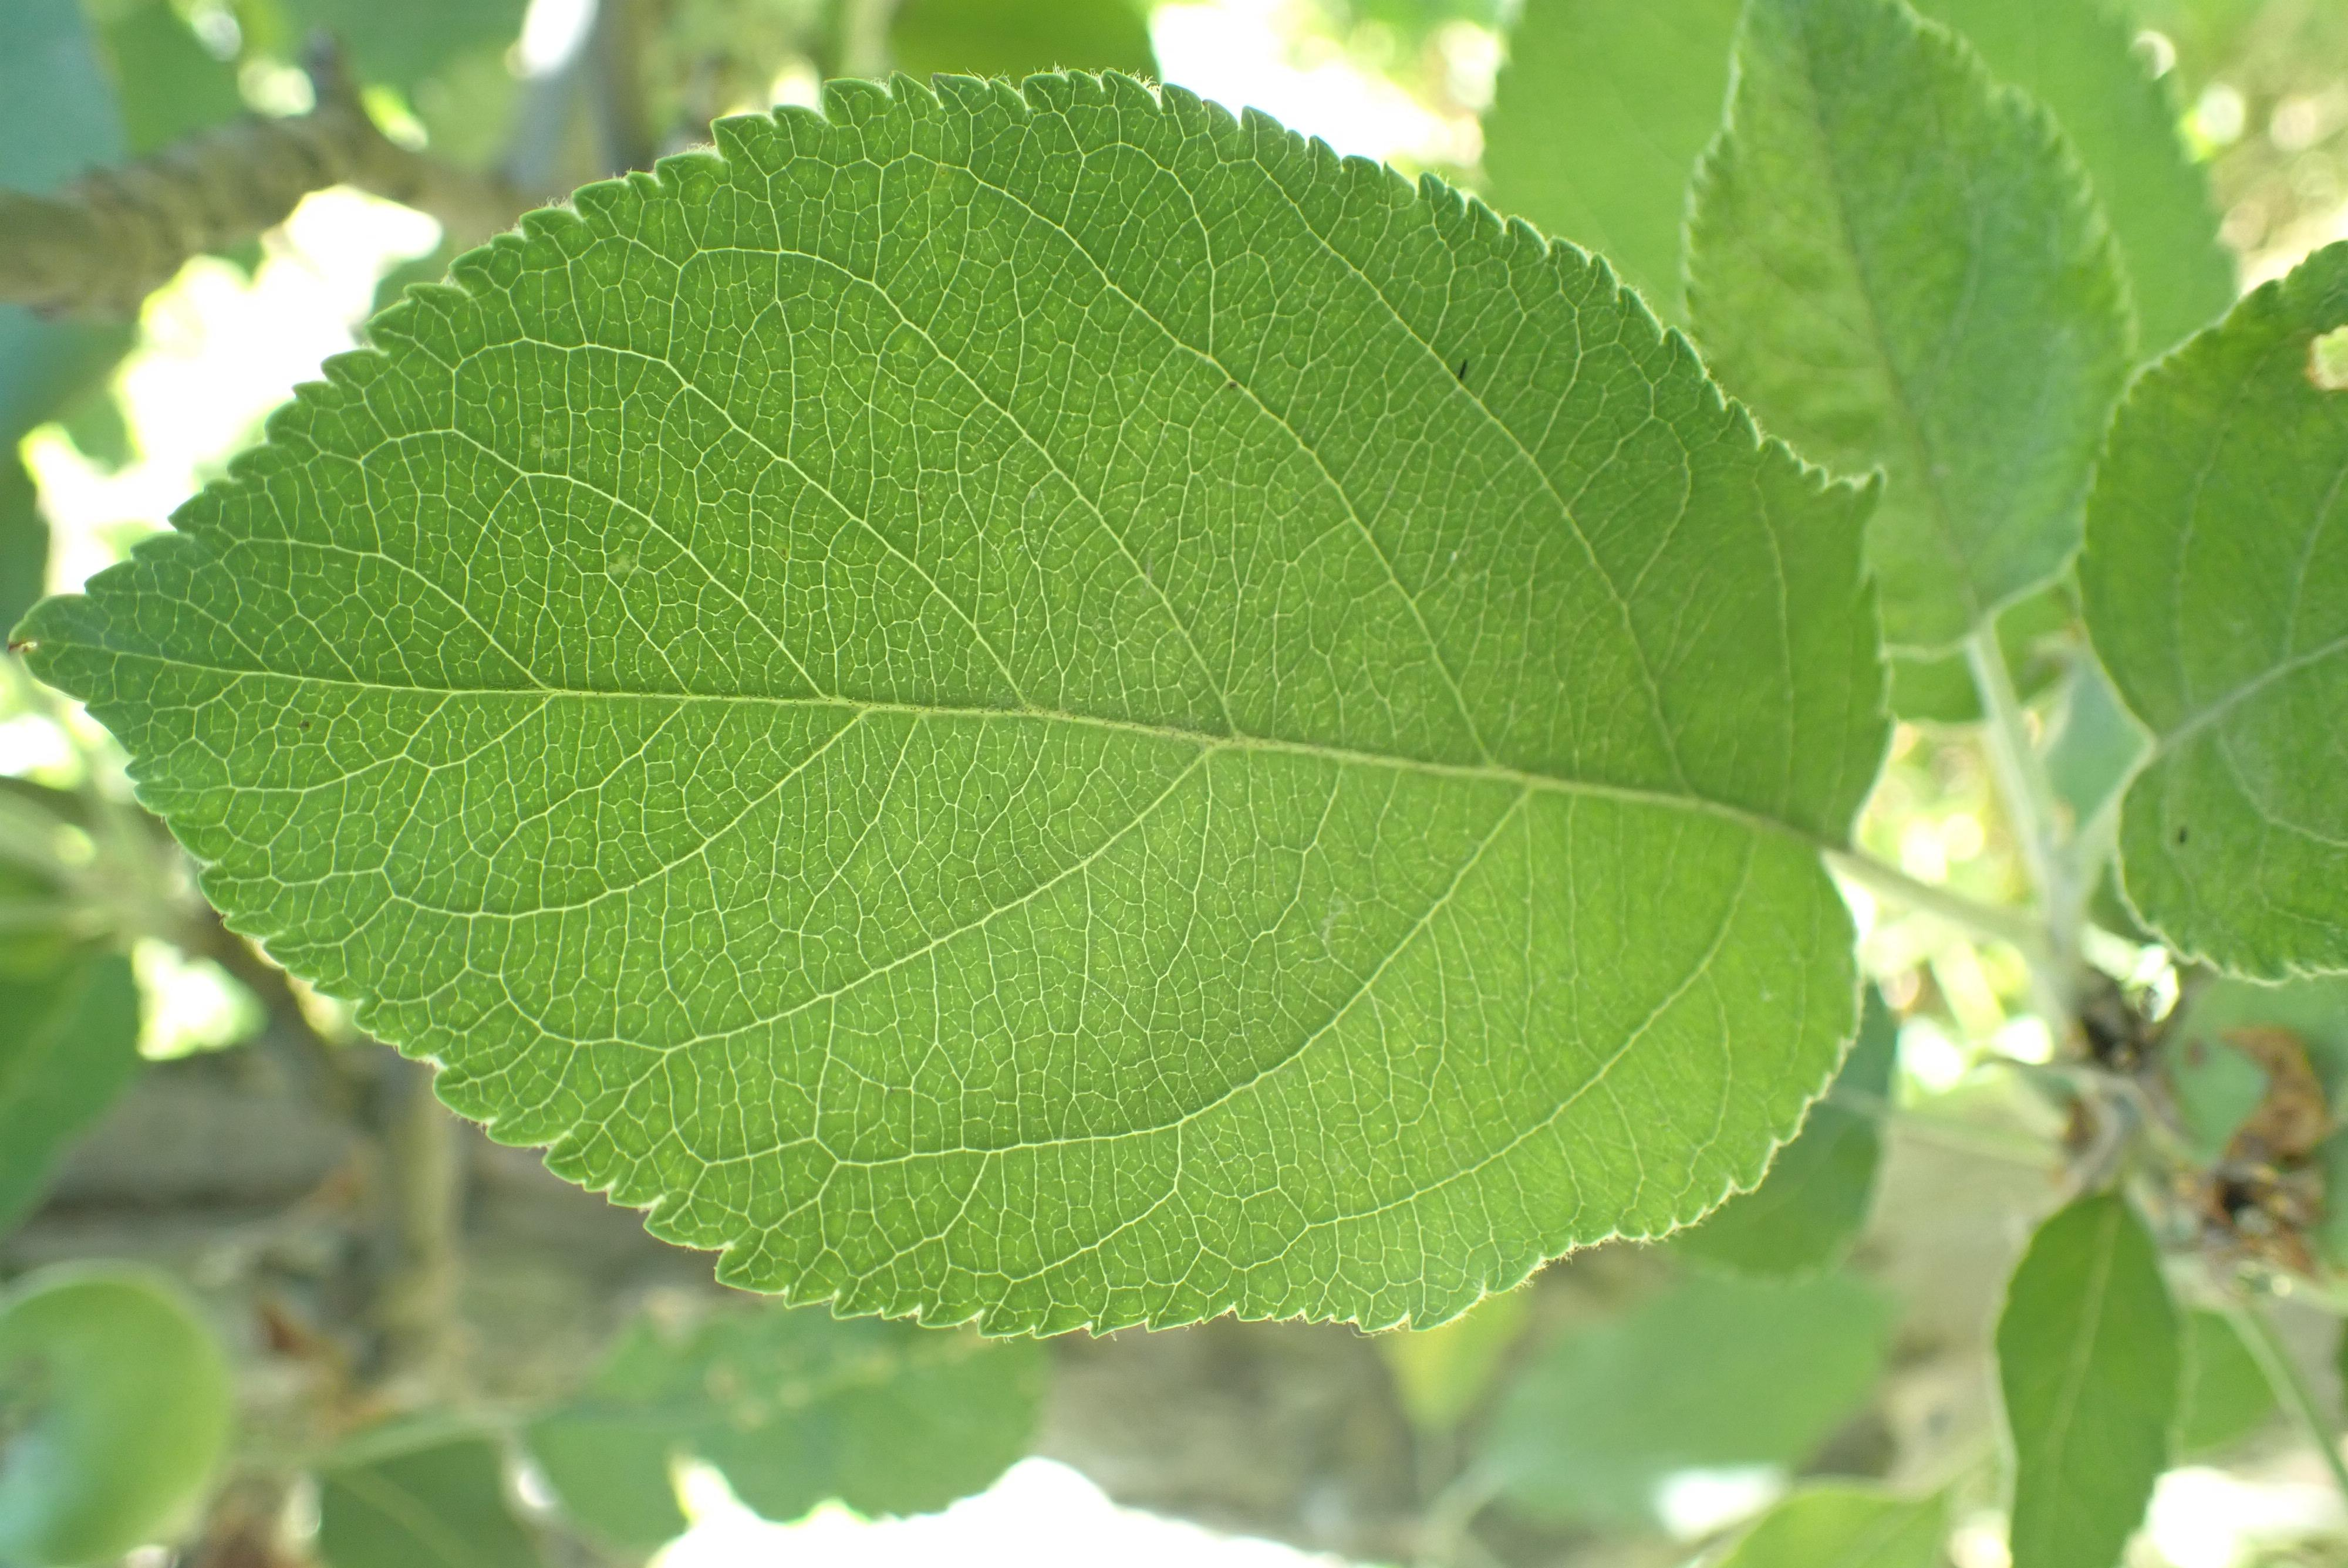

In [12]:
from PIL import Image
import IPython.display as display

image_path = r"C:\Users\cuted\OneDrive\Desktop\Train\Train\Healthy\9d788a91891b8f79.jpg"

if os.path.exists(image_path):
    with open(image_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=500))
else:
    print("File not found.")


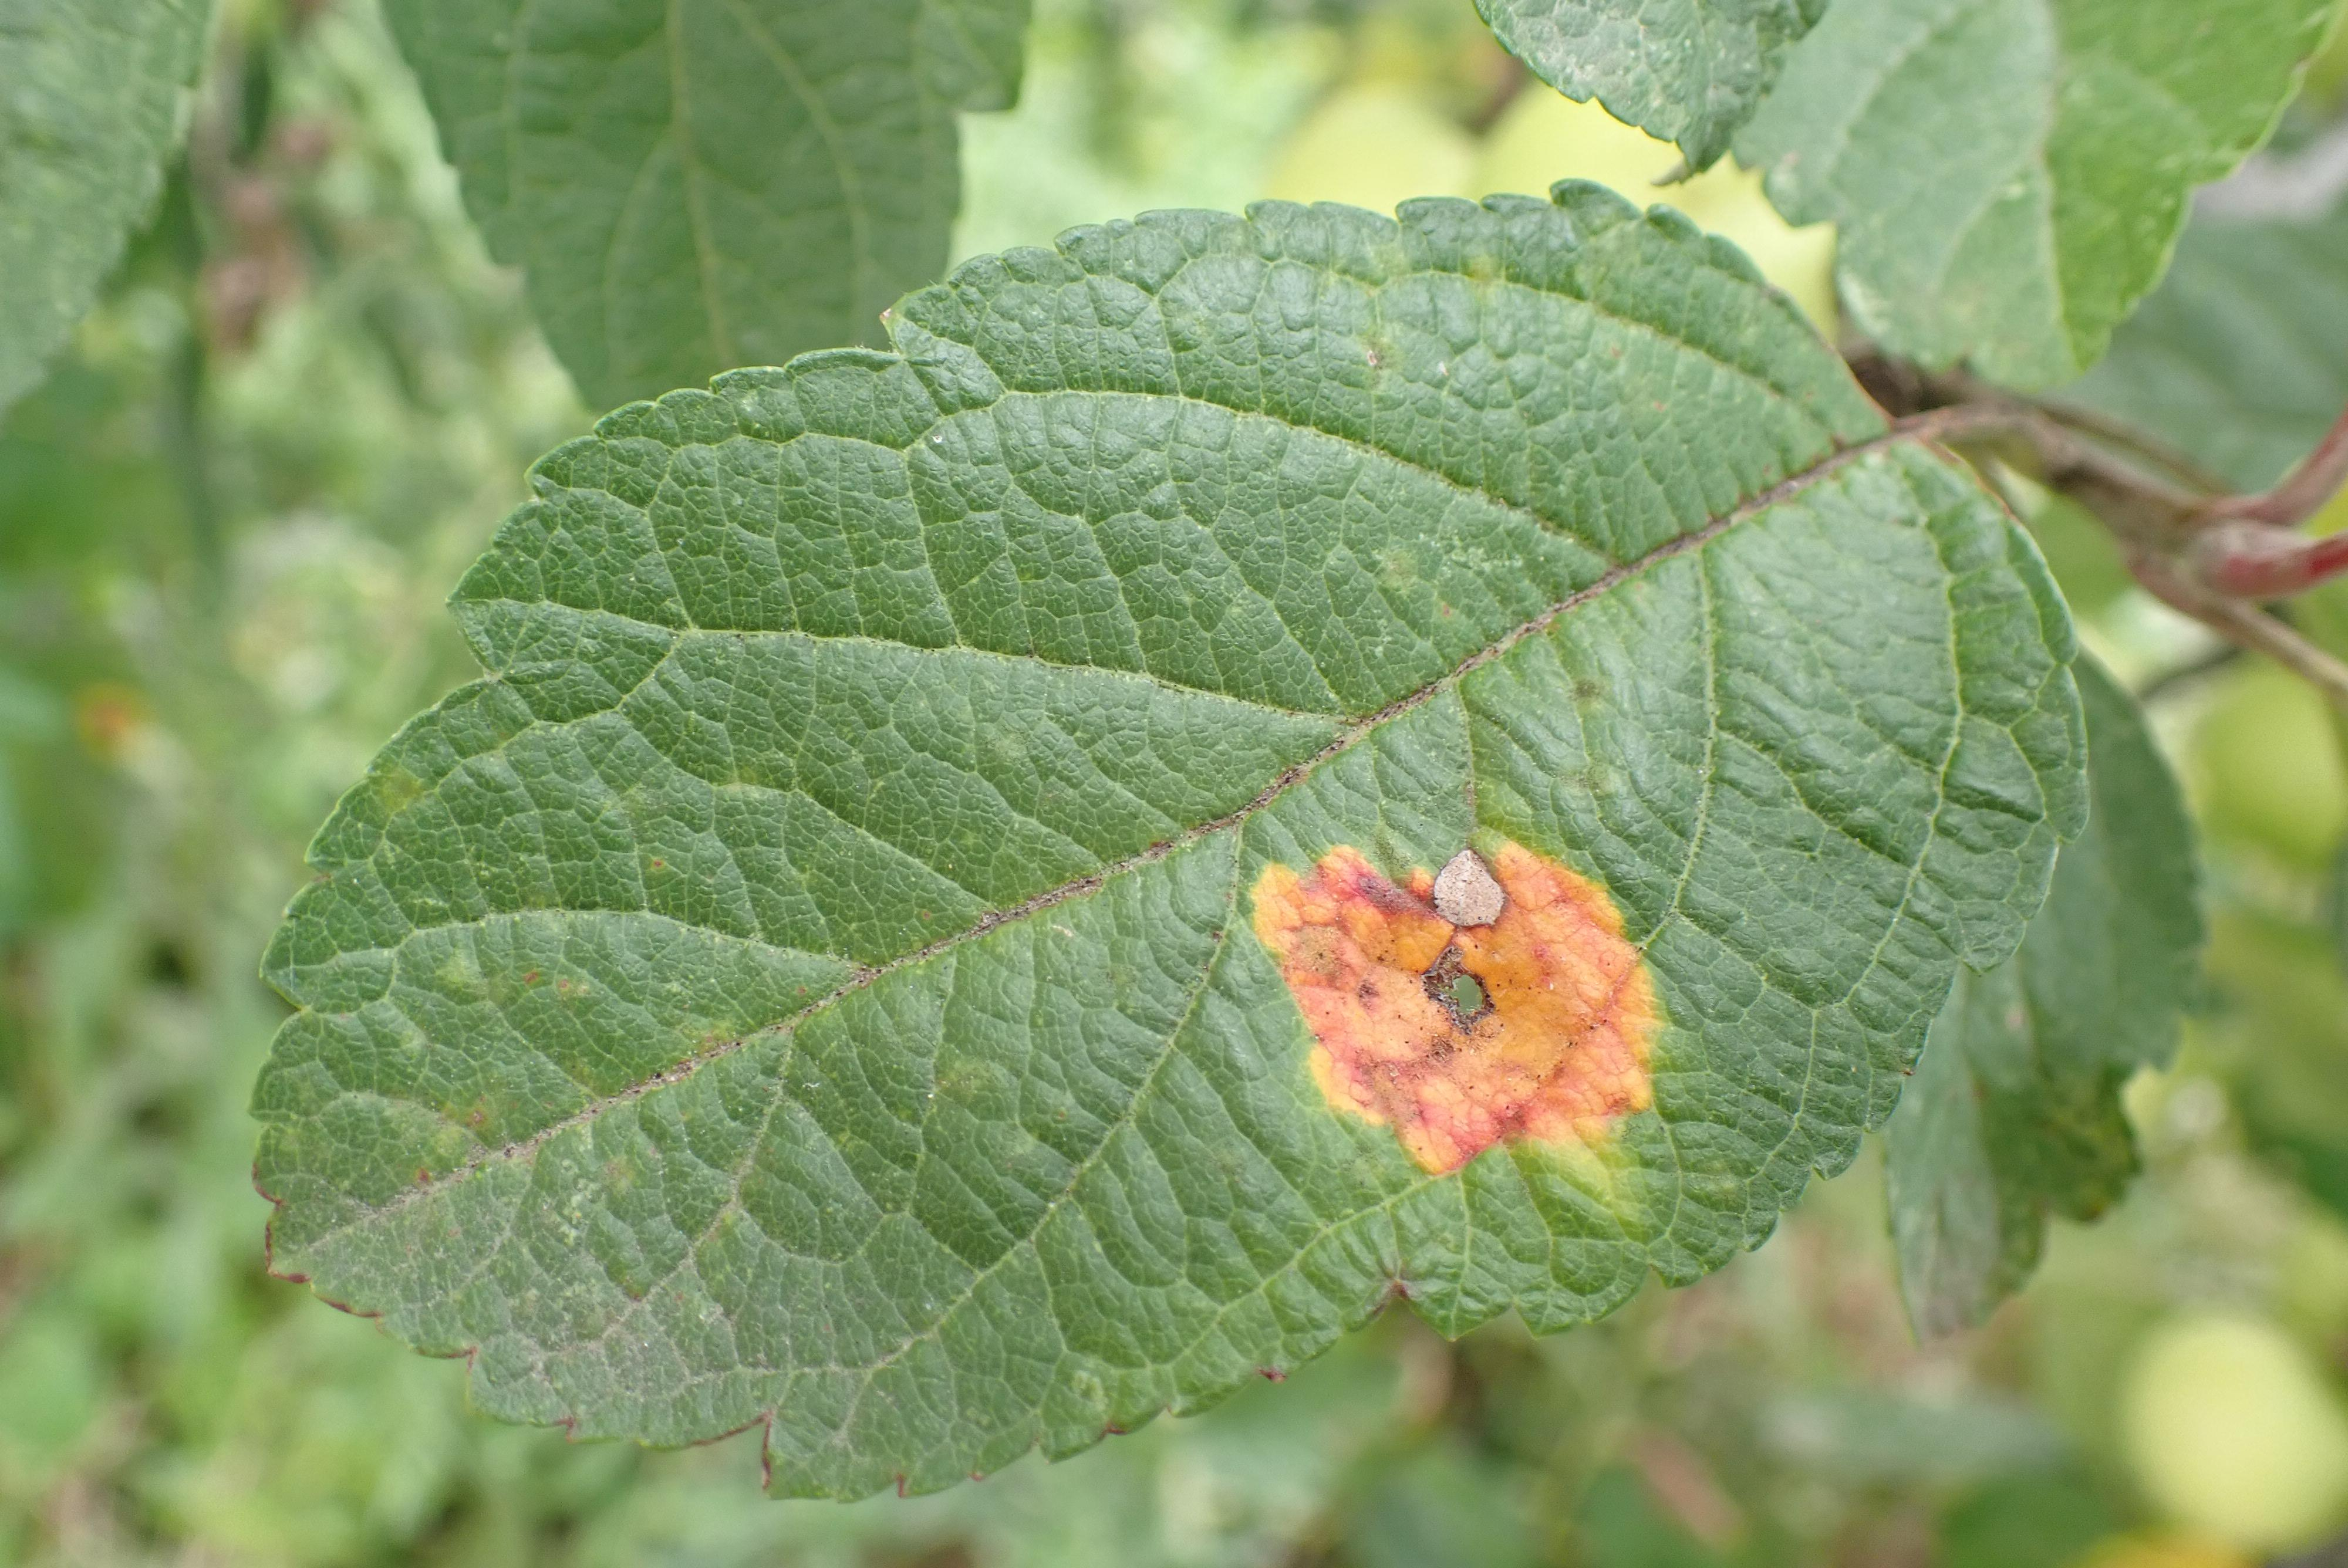

In [13]:
image_path = r"C:\Users\cuted\OneDrive\Desktop\Train\Train\Rust\9894ad9bae345365.jpg"
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Create an ImageDataGenerator for testing with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)


In [16]:
train_generator = train_datagen.flow_from_directory(r'C:\Users\cuted\OneDrive\Desktop\Train\Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r'C:\Users\cuted\OneDrive\Desktop\Validation\Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()

# Explicitly define the input layer
model.add(Input(shape=(225, 225, 3)))

# Then add the Conv2D layer without the input_shape argument
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.4165 - loss: 3.3542 - val_accuracy: 0.7000 - val_loss: 0.8292
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.7066 - loss: 0.7508 - val_accuracy: 0.7833 - val_loss: 0.6771
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.7760 - loss: 0.5794 - val_accuracy: 0.8500 - val_loss: 0.5268
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.8661 - loss: 0.3587 - val_accuracy: 0.7500 - val_loss: 0.7182
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.8776 - loss: 0.3158 - val_accuracy: 0.8500 - val_loss: 0.4410


In [22]:
!pip install scipy


  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)


In [25]:
!pip install seaborn


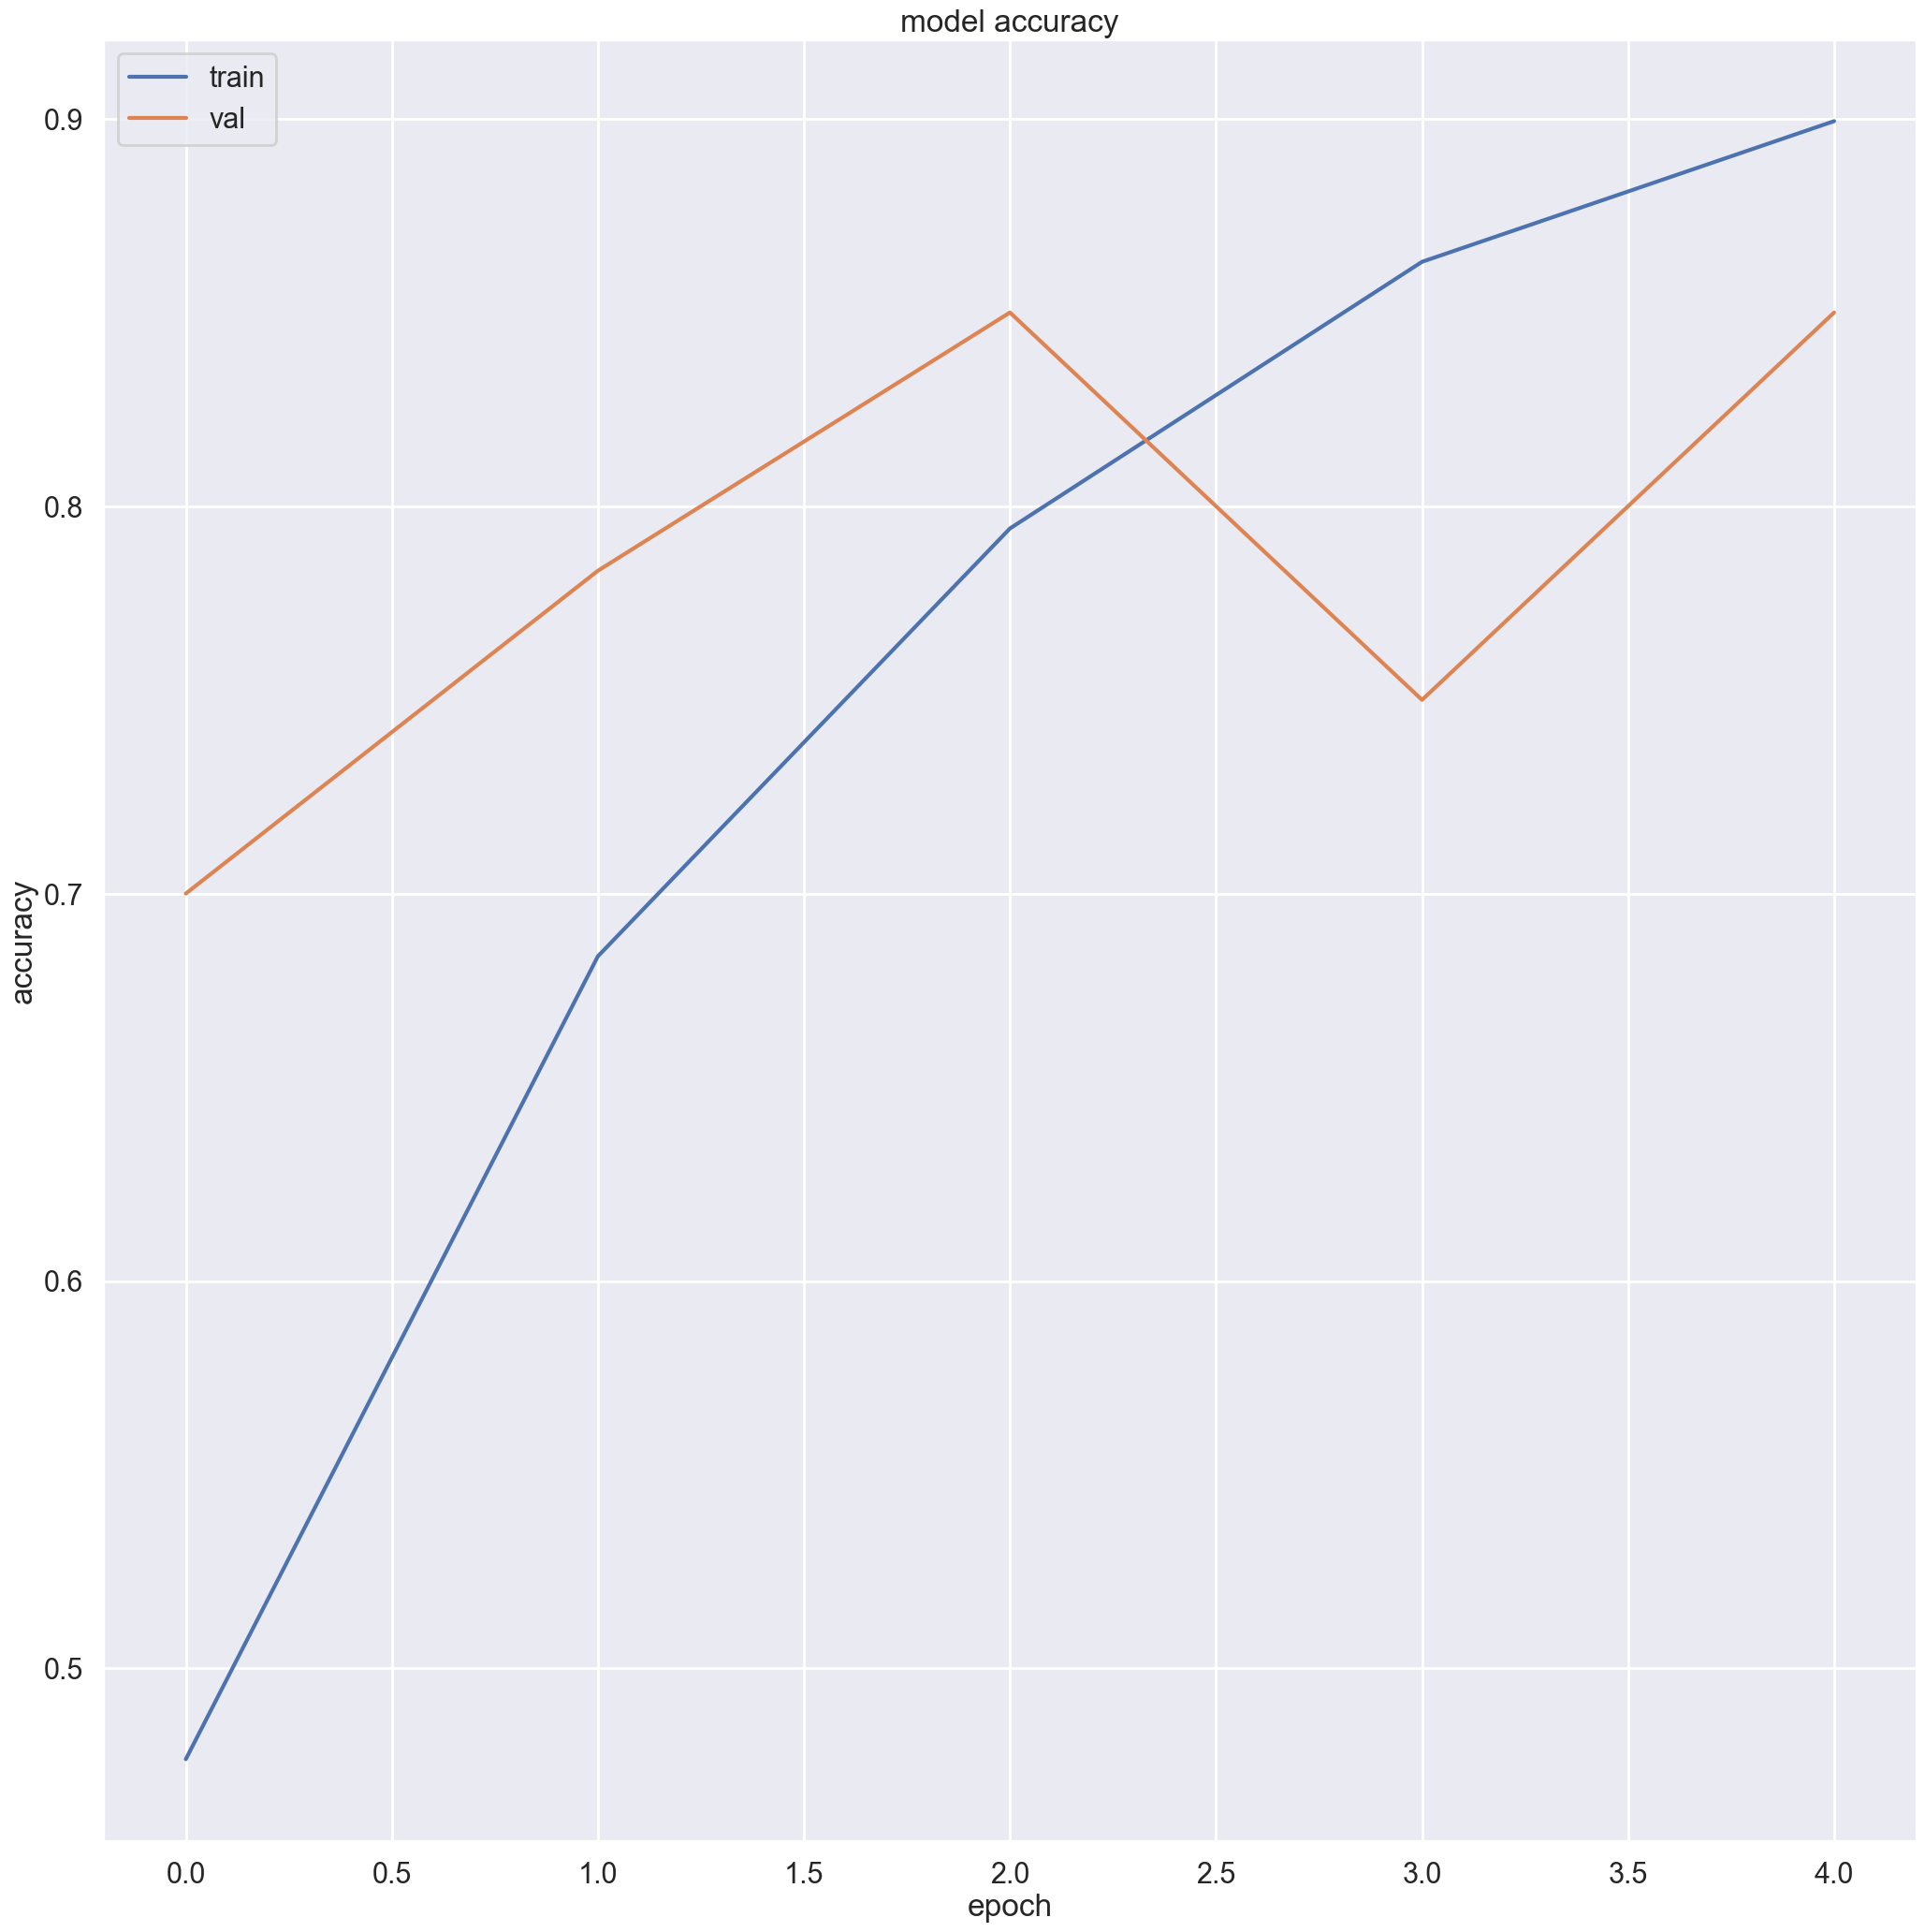

In [26]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
model.save("model.keras")

In [30]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\cuted\OneDrive\Desktop\Train\Train\Rust\9894ad9bae345365.jpg")

In [31]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([2.006867e-06, 7.917571e-05, 9.999188e-01], dtype=float32)

In [32]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [34]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
